# GDP PER CAPITA and HEALTH EXPENDITURE PER CAPITA(2018)
Richer countries can afford to invest more on healthcare, on work and road safety, and other measures that reduce mortality. On the other is there any relation between the wealth of a country and the health expenditure of its inhabitants?

The following analysis checks whether there is any correlation between the total gross domestic product per capita (GDPPC) of a country in 2018 and the health expenditure per capita in the country in 2018.

# Getting the data
Two datasets of the World Bank are considered. One dataset, available at http://data.worldbank.org/indicator/NY.GDP.MKTP.CD, lists the GDP per capita of the world's countries in current Internantional dollars, for various years. The use of a common currency allows us to compare GDP values across countries. The other dataset, available at http://data.worldbank.org/indicator/SP.DYN.LE00.IN, lists the health expenditure of the world's countries. The datasets were downloaded as CSV files in June 2021.

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

YEAR = 2018
GDP_INDICATOR = 'NY.GDP.PCAP.PP.CD'
gdpReset = pd.read_csv('WB GDPPCCID 2018.csv')

HEALTH_INDICATOR = 'SH.XPD.CHEX.PP.CD'
healthReset = pd.read_csv('WB HEPCID 2018.csv')
healthReset.head()

,country,year,SH.XPD.CHEX.PP.CD
0,Afghanistan,2018,186.407288
1,Albania,2018,697.304871
2,Algeria,2018,962.719360
3,American Samoa,2018,NaN
4,Andorra,2018,3607.000977


# Cleaning the data
Inspecting the data with head() and tail() shows that:

Datat needs to be cleaned

In [24]:
gdpCountries = gdpReset[0:217].dropna()
healthCountries = healthReset[0:217].dropna()
gdpData = gdpCountries.dropna()
healthData = healthCountries.dropna()
gdpData.head()

,country,year,NY.GDP.PCAP.PP.CD
0,Afghanistan,2018,2156.419482
1,Albania,2018,14224.098070
2,Algeria,2018,12019.928360
5,Angola,2018,6965.511374
6,Antigua and Barbuda,2018,22879.766090


In [25]:
gdpData.tail()

,country,year,NY.GDP.PCAP.PP.CD
209,Vanuatu,2018,3292.544065
211,Vietnam,2018,8397.021042
213,West Bank and Gaza,2018,6495.209267
215,Zambia,2018,3624.024939
216,Zimbabwe,2018,2961.446428


Transforming the data
The World Bank reports GDP in US dollars and cents. To make the data easier to read, the GDP is converted to millions of British pounds (the author's local currency) with the following auxiliary functions, using the average 2018 dollar-to-pound conversion rate provided by http://www.ukforex.co.uk/forex-tools/historical-rate-tools/yearly-average-rates.

In [14]:
def usdToGBP (usd):
    return usd / 1.334801

GDP = 'GDP (£)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(round)
gdpCountries.head()

,country,year,NY.GDP.PCAP.PP.CD,GDP (£)
0,Afghanistan,2018,2156.419482,1616
1,Albania,2018,14224.098070,10656
2,Algeria,2018,12019.928360,9005
5,Angola,2018,6965.511374,5218
6,Antigua and Barbuda,2018,22879.766090,17141


The unnecessary columns can be dropped.

In [15]:
COUNTRY = 'country'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,country,GDP (£)
0,Afghanistan,1616
1,Albania,10656
2,Algeria,9005
5,Angola,5218
6,Antigua and Barbuda,17141


The World Bank reports the health expectancy with several decimal places. After rounding, the original column is discarded.

In [16]:
health = 'health expenditure (pounds)'
healthCountries[health] = healthCountries[HEALTH_INDICATOR].apply(round)
headings = [COUNTRY, health]
healthClean = healthCountries[headings]
healthClean.head()

,country,health expenditure (pounds)
0,Afghanistan,186
1,Albania,697
2,Algeria,963
4,Andorra,3607
5,Angola,165


Combining the data
The tables are combined through an inner join on the common 'country' column.

In [17]:
gdpVshealth = pd.merge(gdpClean, healthClean, on=COUNTRY, how='inner')
gdpVshealth.head()

,country,GDP (£),health expenditure (pounds)
0,Afghanistan,1616,186
1,Albania,10656,697
2,Algeria,9005,963
3,Angola,5218,165
4,Antigua and Barbuda,17141,1406


Calculating the correlation
To measure if the health expectancy and the GDP grow together, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

In [18]:
from scipy.stats import spearmanr

gdpColumn = gdpVshealth[GDP]
healthColumn = gdpVshealth[health]
(correlation, pValue) = spearmanr(gdpColumn, healthColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.9264103865252732
It is statistically significant.


The value shows a direct correlation, i.e. richer countries tend to have longer health expectancy, but it is not very strong.

Showing the data
Measures of correlation can be misleading, so it is best to see the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few million to several billion (million of million) pounds.

<AxesSubplot:xlabel='GDP (£)', ylabel='health expenditure (pounds)'>

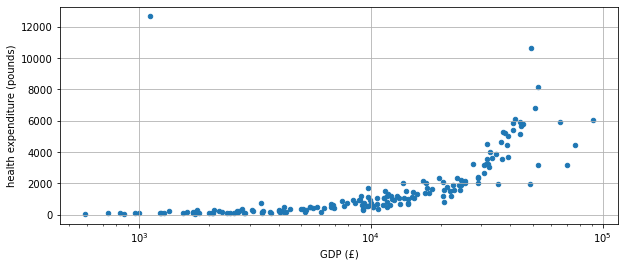

In [19]:
%matplotlib inline
gdpVshealth.plot(x=GDP, y=health, kind='scatter', grid=True, logx=True, figsize=(10, 4))

The plot shows there is a clear correlation: there are rich countries with high health expenditure, poor countries with low health expenditure,

Comparing the 10 poorest countries and the 10 countries with the lowest health expenditure and highest health expenditure respectively shows that total GDP per capita vs health expenditure per capita is a better measure. 

In [20]:
# the 10 countries with lowest GDP
gdpVshealth.sort_values(GDP).head(10)

,country,GDP (£),health expenditure (pounds)
26,Burundi,588,66
31,Central African Republic,739,97
97,Malawi,829,120
37,"Congo, Dem. Rep.",859,31
117,Niger,958,78
109,Mozambique,1002,118
93,Liberia,1117,12643
32,Chad,1236,79
160,Togo,1249,109
96,Madagascar,1289,79


In [21]:
# the 10 countries with lowest health expenditure
gdpVshealth.sort_values(health).head(10)

,country,GDP (£),health expenditure (pounds)
37,"Congo, Dem. Rep.",859,31
26,Burundi,588,66
54,Ethiopia,1738,67
117,Niger,958,78
96,Madagascar,1289,79
32,Chad,1236,79
59,"Gambia, The",1739,81
17,Benin,2572,83
100,Mali,1816,90
31,Central African Republic,739,97


In [26]:
# the 10 countries with highest GDP
gdpVshealth.sort_values(GDP).tail(10)

,country,GDP (£),health expenditure (pounds)
44,Denmark,45201,5794
23,Brunei Darussalam,48582,1953
170,United States,48919,10624
120,Norway,50928,6818
168,United Arab Emirates,52509,3173
155,Switzerland,52649,8114
77,Ireland,65341,5897
131,Qatar,70444,3166
142,Singapore,76153,4439
95,Luxembourg,90622,6048


In [27]:
# the 10 countries with highest health expenditure
gdpVshealth.sort_values(health).tail(10)

,country,GDP (£),health expenditure (pounds)
44,Denmark,45201,5794
154,Sweden,41225,5828
8,Austria,43939,5879
77,Ireland,65341,5897
95,Luxembourg,90622,6048
61,Germany,41872,6098
120,Norway,50928,6818
155,Switzerland,52649,8114
170,United States,48919,10624
93,Liberia,1117,12643


# Conclusions and Recommendations
To sum up, there is a strong correlation between a country's wealth and the health expenditure of its inhabitants: poorer countries have lower health expenditures unlike richer countries.

After using the NY.GDP.PCAP.PP.CD indicator, GDP per capita in current 'international dollars' and comparing it with health expenditure per capita in current 'international dollars', makes for a better like-for-like comparison between countries, because it takes population and purchasing power into account and compares it against specific indicator like health expenditure unlike using total GDP measured against life expectancy.. Finally from the above analysis, we see that GDP percapita measured against health expenditure shows a higher statistcal significance of 0.9264103865252732 thereby confirming that it is better measurement of countries wealth.